In [1]:
import graph_class as g
import itertools
import numpy as np
import time

In [2]:
#read graphs and respective optimal tours (if available) from file
#HUGE!
pcb442 = g.heidelberg_2D("./data/pcb442.tsp")
pcb442_opt_nodes = g.heidelberg_optimal_tour("./data/pcb442.opt.tour")
pcb442_optimal_tour = [pcb442.vertices[index] for index in pcb442_opt_nodes]
#small (29 factorial is SMALL)
wi29 = g.heidelberg_2D("./data/wi29.tsp")

In [3]:
#brute force with a random start implementation
def brute_force(graph, max_iterations = np.infty, random_init = True, return_graph = True):
    
    start = time.time()    
    
    if random_init:
        nodes = np.random.permutation(graph.vertices)
    else:
        nodes = graph.vertices
        
    #creates an iterator instead of saving all paths (which is impossible except for very small problems)      
    allpaths = iter((itertools.permutations(nodes)))
    min_weight = np.infty
    step = 0
    
    while step < max_iterations:
        step += 1
        this_path = next(allpaths)
        
        current_path_weight = graph.get_cycle_weight(this_path)
        
        if current_path_weight < min_weight:
            min_weight = current_path_weight
            min_path = this_path
            
    end = time.time()
    if return_graph:
        node_output = g.plotTSP_2D(min_path)
    else:
        node_output = min_path
    return end-start, min_weight, node_output

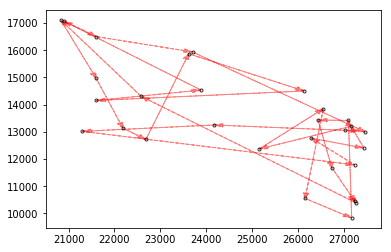

(2.0760793685913086, 70899, None)

In [4]:
brute_force(wi29, max_iterations=100000)

In [5]:
# simulated annealing implementation
def simulated_annealing(graph,random_init = True, temperature = 100000, return_graph = True):
    #ISSUES:
    #1. Cools one degree for every computation step. Should be decoupled: simulate cooling time using a "cooling function"
    #2. Instead of shuffling a random path, should maximize the distance between the two permutations (since the length 
        # of the sequence to be shuffled is already random). This could be done using, perhaps, the "Kendal tau distance":
        # [[https://en.wikipedia.org/wiki/Kendall_tau_distance]]
    start = time.time()
    if random_init:
        nodes = np.random.permutation(graph.vertices)
    else:
        nodes = graph.vertices
        
    current_min = graph.get_cycle_weight(nodes)
    
    for i in range(temperature):
        k = np.random.randint(0,len(nodes))
        p = np.random.randint(k,len(nodes))
        np.random.shuffle(nodes[k:p])
        test_min = graph.get_cycle_weight(nodes)
        if np.exp(-(test_min-current_min)**2/(temperature-i))> np.random.rand():
            current_min = test_min
        else:
            current_min = min(current_min, test_min)    
    
    end = time.time()
    if return_graph:
        node_output = g.plotTSP_2D(nodes)
    else:
        node_output = nodes
    return end-start, current_min, node_output

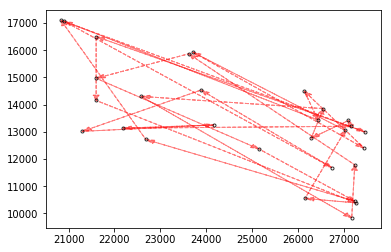

(4.572742223739624, 68725, None)

In [6]:
simulated_annealing(wi29)